<a href="https://colab.research.google.com/github/wanguiwaweru/Data-Science-Projects/blob/main/Tate_Musuem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [22]:
!pip install seaborn


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Load Data

In [24]:
# Corrected URLs to point to the raw CSV data
artwork_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv'
artist_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artists.csv'

artwork_df = pd.read_csv(artwork_url)
artist_df = pd.read_csv(artist_url)

## Artwork Dataset

Visualize and Clean Data

In [25]:
artwork_df.head()

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394.0,419.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311.0,213.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785.0,1922.0,support: 343 x 467 mm,343.0,467.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318.0,394.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826.0,1919.0,image: 243 x 335 mm,243.0,335.0,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [26]:
artwork_df.shape

(69201, 20)

In [27]:
artwork_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69201 entries, 0 to 69200
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  69201 non-null  int64  
 1   accession_number    69201 non-null  object 
 2   artist              69201 non-null  object 
 3   artistRole          69201 non-null  object 
 4   artistId            69201 non-null  int64  
 5   title               69201 non-null  object 
 6   dateText            69201 non-null  object 
 7   medium              62817 non-null  object 
 8   creditLine          69198 non-null  object 
 9   year                63804 non-null  float64
 10  acquisitionYear     69156 non-null  float64
 11  dimensions          66768 non-null  object 
 12  width               65834 non-null  float64
 13  height              65859 non-null  float64
 14  depth               2514 non-null   float64
 15  units               65860 non-null  object 
 16  insc

In [28]:
artwork_df.isnull().sum()

,0
id,0
accession_number,0
artist,0
artistRole,0
artistId,0
title,0
dateText,0
medium,6384
creditLine,3
year,5397


In [29]:
artworks = artwork_df.drop(columns=["accession_number", "artistRole", "artistId", "dateText", "creditLine", "units", "inscription", "thumbnailCopyright", "thumbnailUrl", "url"], axis=1)

print(artworks.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69201 entries, 0 to 69200
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               69201 non-null  int64  
 1   artist           69201 non-null  object 
 2   title            69201 non-null  object 
 3   medium           62817 non-null  object 
 4   year             63804 non-null  float64
 5   acquisitionYear  69156 non-null  float64
 6   dimensions       66768 non-null  object 
 7   width            65834 non-null  float64
 8   height           65859 non-null  float64
 9   depth            2514 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.3+ MB
None


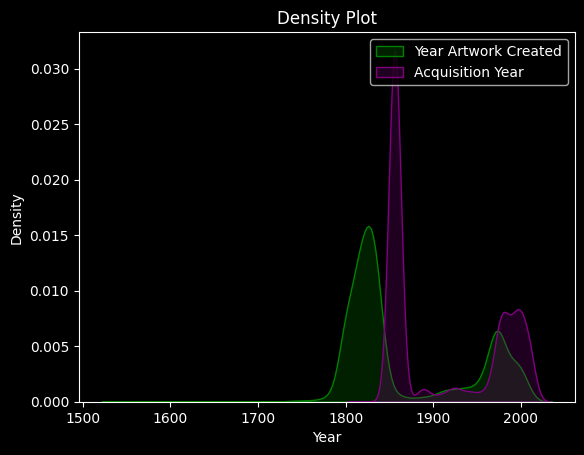

In [35]:
sns.kdeplot(data=artworks, x='year', fill=True, color='green', label='Year Artwork Created')
sns.kdeplot(data=artworks, x='acquisitionYear', fill=True, color='purple', label='Acquisition Year')

plt.legend(title=None)
plt.title('Density Plot')
plt.xlabel('Year')
plt.ylabel('Density')
#plt.grid(True)
plt.show()



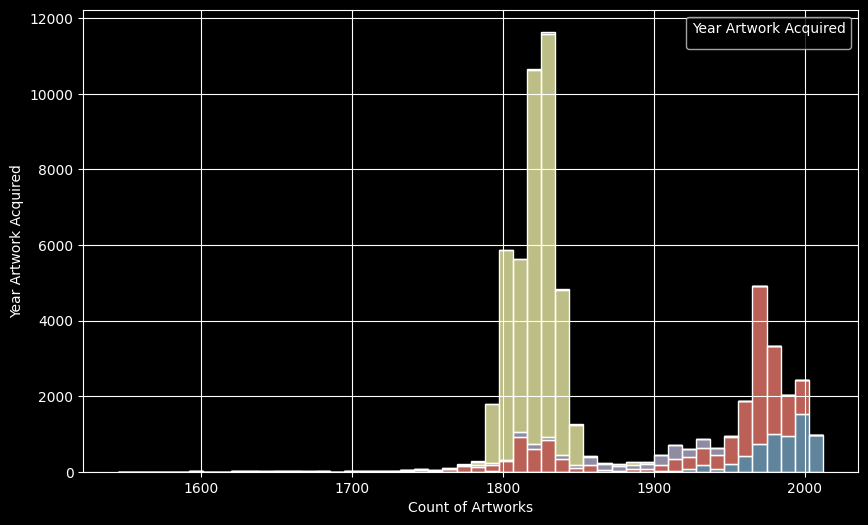

In [36]:
artworks['halfcentury'] = pd.cut(artworks['acquisitionYear'],
                                      bins=[1800, 1850, 1900, 1950, 2000, 2050],
                                      labels=["1800-1849", "1850-1899", "1900-1949", "1950-1999", "2000-2050"],
                                      include_lowest=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=artworks, x='year', hue='halfcentury', bins=50, multiple='stack')
plt.xlabel('Count of Artworks')
plt.ylabel('Year Artwork Acquired')
plt.legend(title='Year Artwork Acquired')
plt.grid(True)
plt.show()

Year of Artwork Creation versus Year Acquired by Tate Gallery

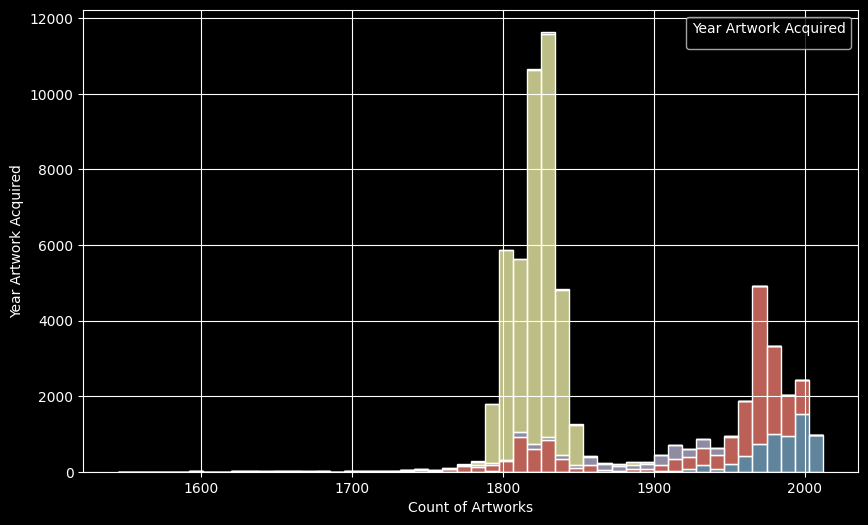

In [37]:
# Assuming artworks_rem is a pandas DataFrame
artworks['halfcentury'] = pd.cut(artworks['acquisitionYear'],
                                      bins=[1800, 1850, 1900, 1950, 2000, 2050],
                                      labels=["1800-1849", "1850-1899", "1900-1949", "1950-1999", "2000-2050"],
                                      include_lowest=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=artworks, x='year', hue='halfcentury', bins=50, multiple="stack")
plt.xlabel("Count of Artworks")
plt.ylabel("Year Artwork Acquired")
plt.legend(title="Year Artwork Acquired")
plt.grid(True)
plt.show()


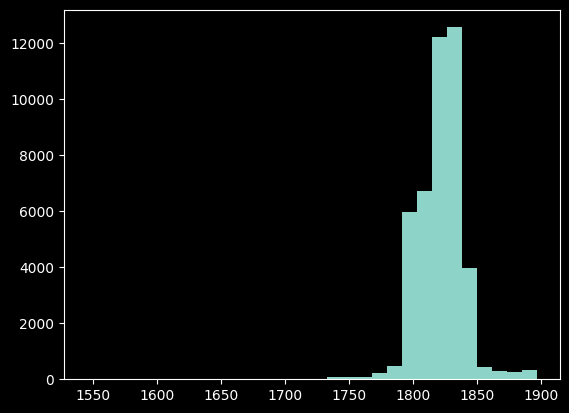

In [40]:
artworks_pre_tate = artworks[artworks['year'] <= 1897]
plt.hist(artworks_pre_tate['year'], bins=30)

plt.show()


In [41]:
top_artists = artworks_pre_tate['artist'].value_counts().nlargest(5)

There appears to be a lot of artworks by Turner, making up 89% of the pre-Tate collection. Let’s explore this further.



<ipython-input-42-bc5e6feb8a17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_pre_tate['artist_turner'] = artworks_pre_tate['artist'] == "Turner, Joseph Mallord William"


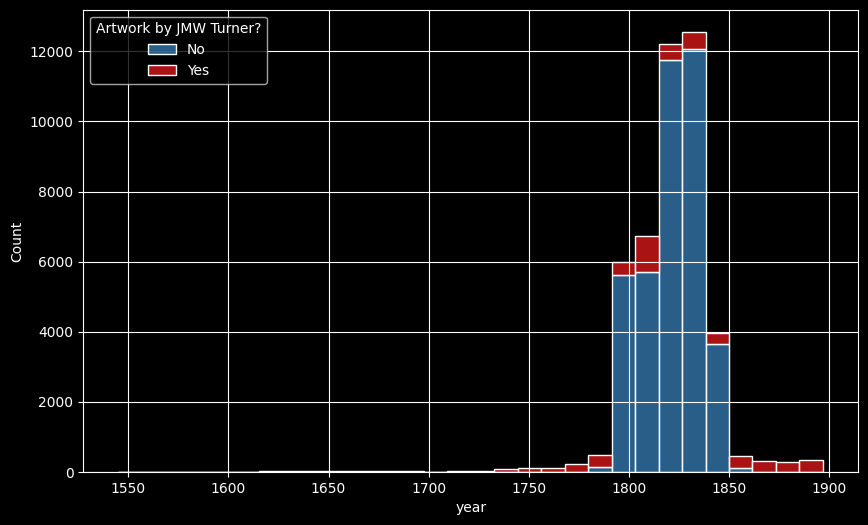

In [42]:
# Assuming 'artworks_pre_tate' is a pandas DataFrame
artworks_pre_tate['artist_turner'] = artworks_pre_tate['artist'] == "Turner, Joseph Mallord William"

plt.figure(figsize=(10, 6))
sns.histplot(artworks_pre_tate, x='year', hue='artist_turner', bins=30, multiple='stack', palette="Set1")

plt.legend(title="Artwork by JMW Turner?", labels=["No", "Yes"])
plt.grid(True)
plt.show()

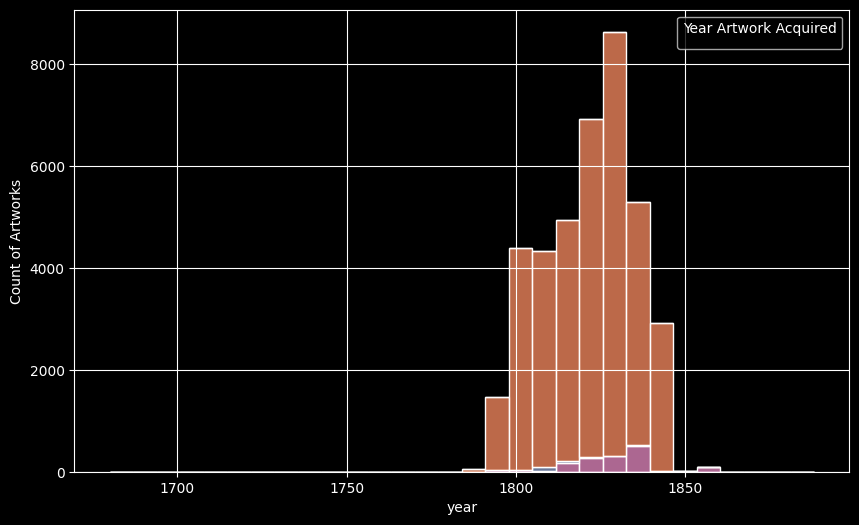

In [43]:

artworks_turner = artworks_pre_tate[artworks_pre_tate['artist'] == "Turner, Joseph Mallord William"]

plt.figure(figsize=(10, 6))
sns.histplot(artworks_turner, x='year', hue='halfcentury', bins=30, multiple='stack', palette="Set2")

plt.legend(title="Year Artwork Acquired")
plt.ylabel("Count of Artworks")
plt.grid(True)
plt.show()


Aspect Ratio through Time


<ipython-input-44-2549eddabe3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_ar['aspectratio'] = artworks_ar['height'] / artworks_ar['width']


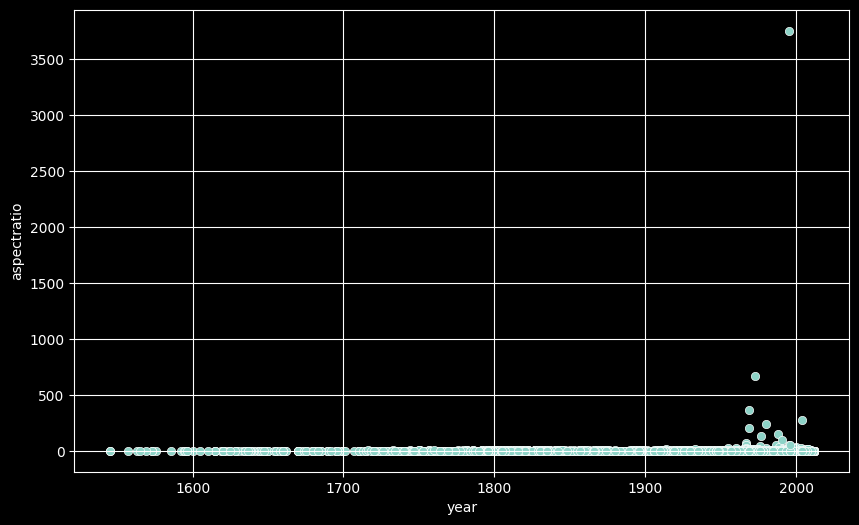

In [44]:
artworks_ar = artworks.dropna(subset=['height', 'width', 'year'])

artworks_ar['aspectratio'] = artworks_ar['height'] / artworks_ar['width']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=artworks_ar, x='year', y='aspectratio')

plt.grid(True)
plt.show()

In [45]:
artworks_ar = artworks_ar.sort_values(by='aspectratio')

artworks_ar[artworks_ar['aspectratio'] > 3000]

,id,artist,title,medium,year,acquisitionYear,dimensions,width,height,depth,halfcentury,aspectratio
62478,21561,"Balka, Miroslaw",[diameter]1 x 3750,Steel,1995.0,1996.0,unconfirmed: 10 x 37500 x 10 mm,10.0,37500.0,10.0,1950-1999,3750.0


The Rise of Postmodernism

In [46]:
artworks_ar = artworks_ar.sort_values(by='aspectratio')

artworks_ar[artworks_ar['aspectratio'] > 3000]

,id,artist,title,medium,year,acquisitionYear,dimensions,width,height,depth,halfcentury,aspectratio
62478,21561,"Balka, Miroslaw",[diameter]1 x 3750,Steel,1995.0,1996.0,unconfirmed: 10 x 37500 x 10 mm,10.0,37500.0,10.0,1950-1999,3750.0


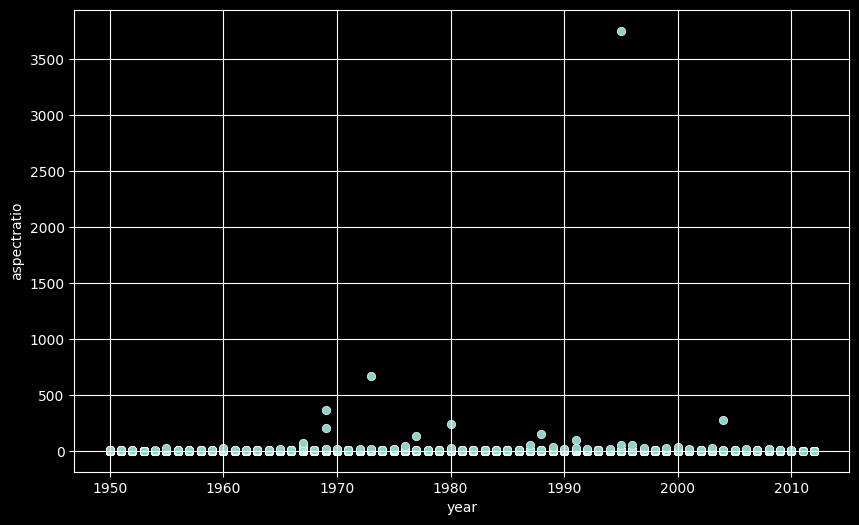

In [47]:
artworks_ar_1950 = artworks_ar[artworks_ar['year'] >= 1950]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=artworks_ar_1950, x='year', y='aspectratio')

plt.grid(True)
plt.show()

Using Aspect Ratio to Predict Year of Artwork Creation

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming artworks_ar is a pandas DataFrame
artworks_ar['century'] = pd.cut(
    artworks_ar['year'],
    bins=[1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050],
    labels=[
        "1500-1549", "1550-1600", "1600-1649", "1650-1699",
        "1700-1749", "1750-1799", "1800-1849", "1850-1899",
        "1900-1949", "1950-1999", "2000-2050"
    ],
    include_lowest=True
)

# Splitting the data into train and test sets
train, test = train_test_split(artworks_ar, test_size=0.3, stratify=artworks_ar['century'])


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the data for the model
X_train = train[['aspectratio']]  # Feature(s)
y_train = train['century']        # Target

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Print model information
print("Random Forest Classifier trained successfully!")

# Display feature importance (optional)
feature_importances = rf.feature_importances_
print("Feature Importances:", feature_importances)

# Predict on the test data (optional, for evaluation)
X_test = test[['aspectratio']]
y_test = test['century']
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Random Forest Classifier trained successfully!
Feature Importances: [1.]
              precision    recall  f1-score   support

   1500-1549       0.00      0.00      0.00         1
   1550-1600       0.00      0.00      0.00         4
   1600-1649       0.00      0.00      0.00        12
   1650-1699       0.00      0.00      0.00        15
   1700-1749       0.10      0.06      0.07        51
   1750-1799       0.70      0.65      0.68      1249
   1800-1849       0.89      0.92      0.91     11171
   1850-1899       0.16      0.12      0.14       410
   1900-1949       0.27      0.24      0.25      1070
   1950-1999       0.65      0.65      0.65      4164
   2000-2050       0.53      0.44      0.48       351

    accuracy                           0.77     18498
   macro avg       0.30      0.28      0.29     18498
weighted avg       0.76      0.77      0.77     18498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
from sklearn.metrics import confusion_matrix, classification_report

# Add predictions to the training data
train['predicted_response'] = rf.predict(train[['aspectratio']])

# Generate the confusion matrix
conf_matrix = confusion_matrix(train['century'], train['predicted_response'])

# Print the confusion matrix
print("Confusion Matrix (Training Data):")
print(conf_matrix)

# Optionally, print the classification report for detailed performance metrics
print("\nClassification Report (Training Data):")
print(classification_report(train['century'], train['predicted_response']))


Confusion Matrix (Training Data):
[[    1     0     0     0     0     0     0     0     0     0     0]
 [    0     9     0     0     0     0     0     0     0     1     0]
 [    0     0    20     0     0     1     1     0     1     4     0]
 [    0     0     0    26     0     1     1     0     2     4     0]
 [    0     0     0     0    88     4    10     1     5    12     0]
 [    0     0     0     1     1  2493   284     6    24    99     5]
 [    0     1     0     0     3    82 25531    13    62   358    14]
 [    0     0     1     0     1     8   114   660    52   115     6]
 [    0     0     1     1     1    35   210    17  1859   365     9]
 [    0     0     0     1     1    65   595    16   114  8903    22]
 [    0     0     0     0     1     5    89     1    12   135   575]]

Classification Report (Training Data):
              precision    recall  f1-score   support

   1500-1549       1.00      1.00      1.00         1
   1550-1600       0.90      0.90      0.90        10
   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Data)')
plt.show()


## Artist Dataset

In [50]:
artist_df.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


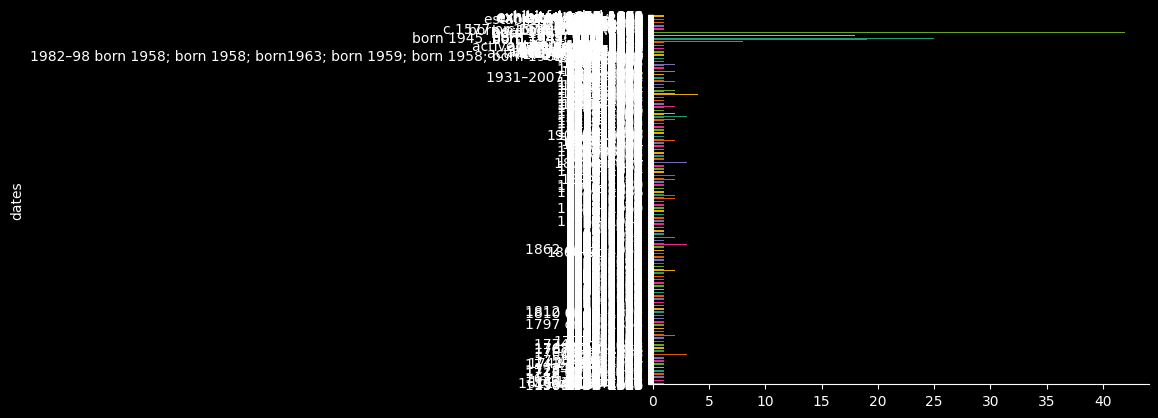

In [51]:
artist_df.groupby('dates').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

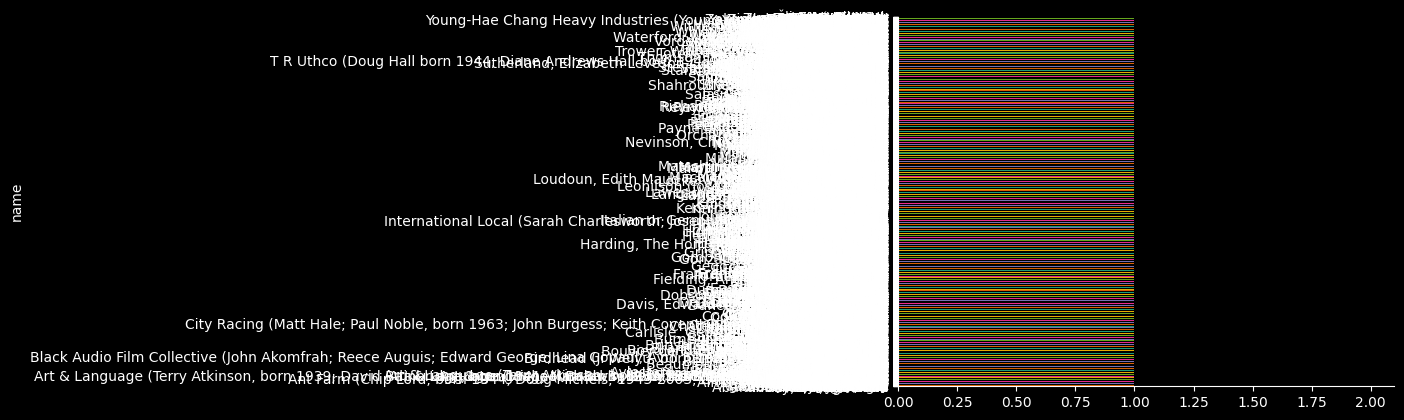

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
artist_df.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

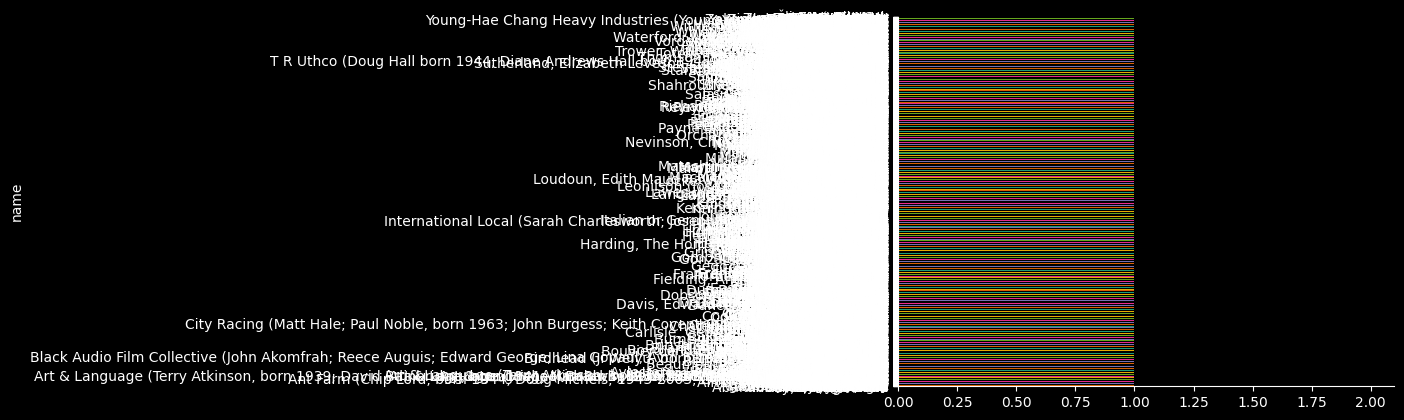

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
artist_df.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

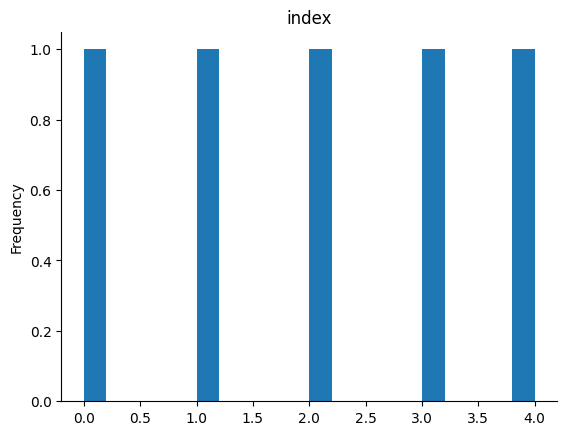

In [ ]:
from matplotlib import pyplot as plt
artist_df['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
artist_df.shape

(3532, 9)

In [54]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3532 non-null   int64  
 1   name          3532 non-null   object 
 2   gender        3416 non-null   object 
 3   dates         3470 non-null   object 
 4   yearOfBirth   3472 non-null   float64
 5   yearOfDeath   2228 non-null   float64
 6   placeOfBirth  3040 non-null   object 
 7   placeOfDeath  1453 non-null   object 
 8   url           3532 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 248.5+ KB


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Assuming 'rf' is your trained RandomForest model and 'train' is your DataFrame
train['predicted_response'] = rf.predict(train)

# Calculate confusion matrix
cm = confusion_matrix(train['century'], train['predicted_response'])
print(cm)

